In [2]:
from typing import Dict, List, Tuple
import torch
from torch.utils.data import DataLoader
from torch import nn
from torch.utils.tensorboard import SummaryWriter
from tqdm.auto import tqdm
from datetime import datetime
from utils.engine import train_func, test_func
from utils.engine import set_seed
import torchvision
import torchinfo
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [3]:
from utils.data_load import load_data

train_dataloader, test_dataloader = load_data("output/", 2)

In [4]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([2, 1, 91, 109, 91]), torch.Size([2]))

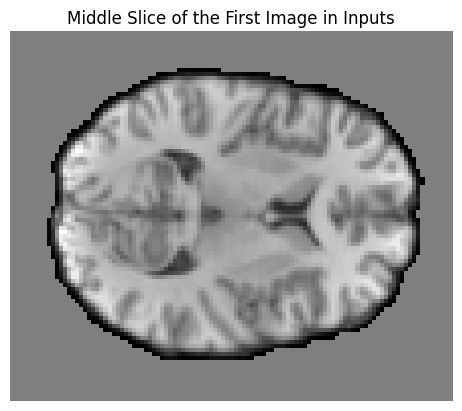

In [51]:
# Select the first image from the inputs tensor 
image = img[0, :, :, :, 40].cpu().numpy() 
# Plot the image 
plt.imshow(image[image.shape[0] // 2], cmap='gray') 
plt.title('Middle Slice of the First Image in Inputs') 
plt.axis('off') 
plt.show()

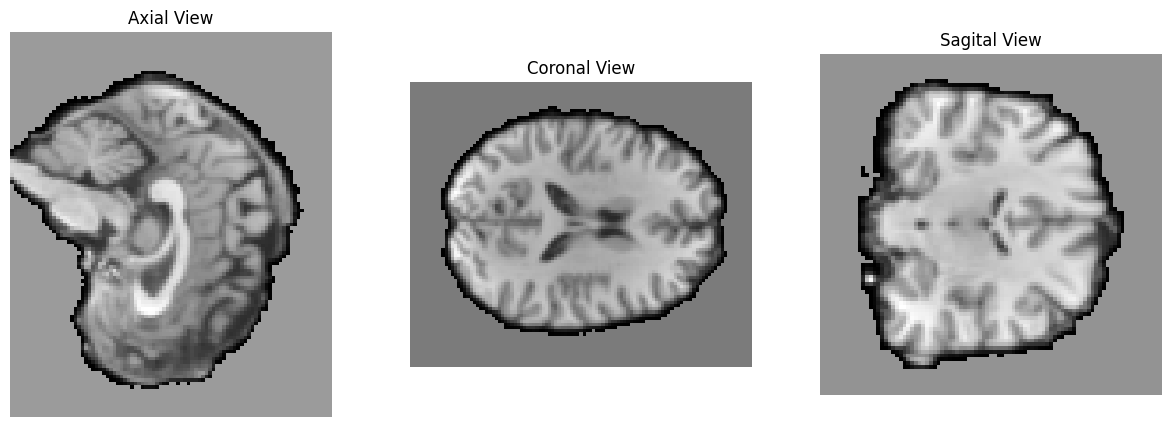

In [33]:
import matplotlib.pyplot as plt
import torch

def extract_slices(image):
    coronal_slice = image[0, :, :, :, image.shape[4] // 2]
    sagital_slice = image[0 , :, :, image.shape[3] // 2, :]
    axial_slice = image[0, :, image.shape[2] // 2, :, :]

    return axial_slice[0], coronal_slice[0], sagital_slice[0]  
axial, coronal, sagital = extract_slices(img)
slices_vector = [axial, coronal, sagital]

def plot_slices(slices):
    titles = ['Axial View', 'Coronal View', 'Sagital View']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (slice, title) in enumerate(zip(slices, titles)):
        axes[i].imshow(slice, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.show()

plot_slices(slices_vector)







In [68]:
axial, coronal, sagital = extract_slices(img)
print("Shape of axial slice:", axial.shape)
print("Shape of coronal slice:", coronal.shape)
print("Shape of sagital slice:", sagital.shape)


Shape of axial slice: (109, 91)
Shape of coronal slice: (91, 109)
Shape of sagital slice: (91, 91)


In [69]:
image.shape[1]
#image = F.pad(image, (54, 54, 46, 47, 54, 54)) 
# añadir padding abajo y arriba para llegar a 224 y 224.
#añadir esas tres vistas de imagenes a los 3 canales y el padding para tener la forma (3(vistas anatomicas, imagen), 224,224)


91

In [43]:
import numpy as np
import torch.nn.functional as F

def add_padding(image, target_shape=(224, 224)):
    pad_y = (target_shape[0] - image.shape[0]) // 2
    pad_x = (target_shape[1] - image.shape[1]) // 2
    padding = (target_shape[1] - image.shape[1] - pad_x, pad_x,
               pad_y, target_shape[0] - image.shape[0] - pad_y)
    print("Padding:", padding)
    padded_image = F.pad(image, padding)
    return padded_image

axial_pad = add_padding(axial)
coronal_pad = add_padding(coronal)
sagital_pad = add_padding(sagital)

print("Shape of padded axial slice:", axial_pad.shape)
print("Shape of padded coronal slice:", coronal_pad.shape)
print("Shape of padded sagital slice:", sagital_pad.shape)


Padding: (67, 66, 57, 58)
Padding: (58, 57, 66, 67)
Padding: (67, 66, 66, 67)
Shape of padded axial slice: torch.Size([224, 224])
Shape of padded coronal slice: torch.Size([224, 224])
Shape of padded sagital slice: torch.Size([224, 224])


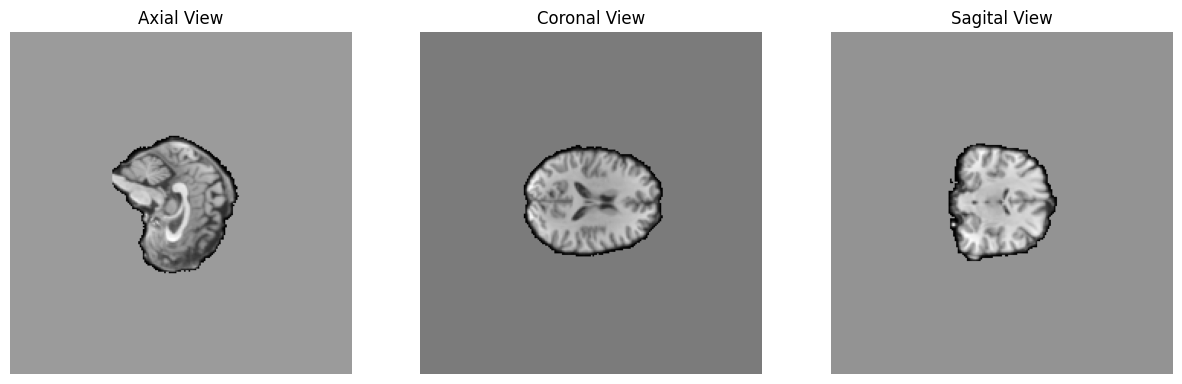

In [44]:

slices_pad = [axial_pad, coronal_pad, sagital_pad]
plot_slices(slices_pad)


In [45]:

#volver las imagens tensor primero
#ax = torch.tensor(axial_pad) 
#cor = torch.tensor(coronal_pad) 
#sag = torch.tensor(sagital_pad)

tensor = torch.stack([axial_pad, coronal_pad, sagital_pad]) #hago el tensor quien sabe si es asi

print("Shape of the final tensor:", tensor.shape)

c1 = tensor[0]
c2 = tensor[1] 
c3 = tensor[2]


Shape of the final tensor: torch.Size([3, 224, 224])


Shape of axial channel: torch.Size([224, 224])
Shape of coronal channel: torch.Size([224, 224])
Shape of sagital channel: torch.Size([224, 224])


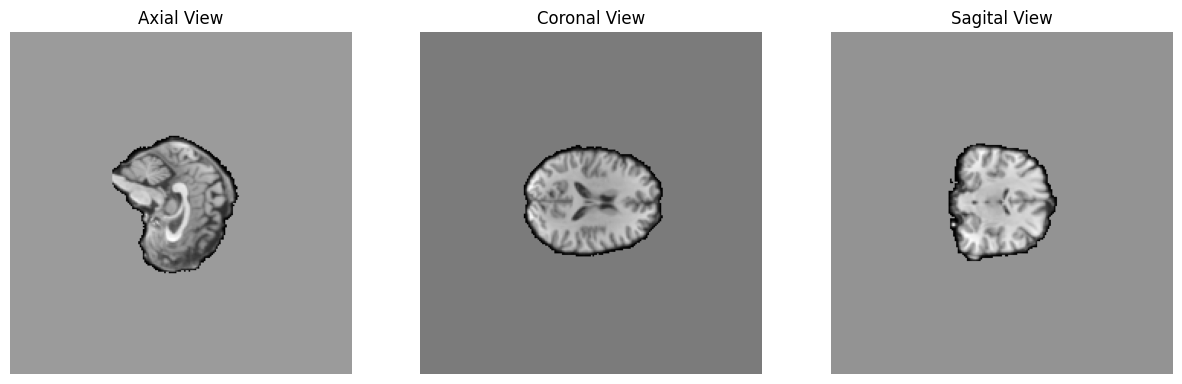

In [46]:

print("Shape of axial channel:", c1.shape)
print("Shape of coronal channel:", c2.shape)
print("Shape of sagital channel:", c3.shape)
channels = [c1, c2, c3]
plot_slices(channels)
